/tmp/ipykernel_1124851/537596387.py:71: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:black'` for the same effect.

  sns.pointplot(data=filtered_dataframes, x='Treatment', y=measure_name, hue='Treatment', order=filtered_treatments, color='black') # errorbar='se',


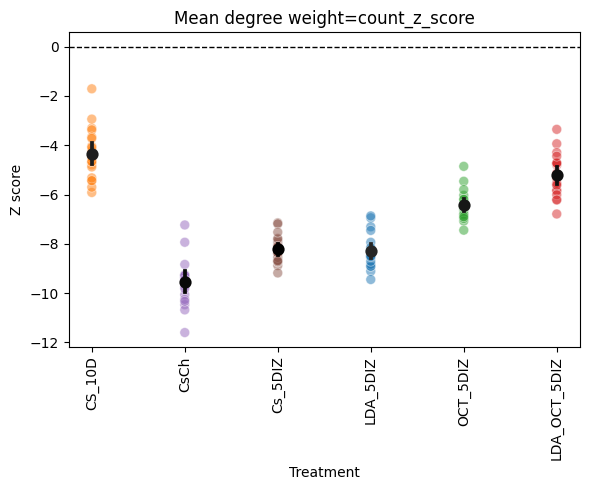

/tmp/ipykernel_1124851/537596387.py:71: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:black'` for the same effect.

  sns.pointplot(data=filtered_dataframes, x='Treatment', y=measure_name, hue='Treatment', order=filtered_treatments, color='black') # errorbar='se',


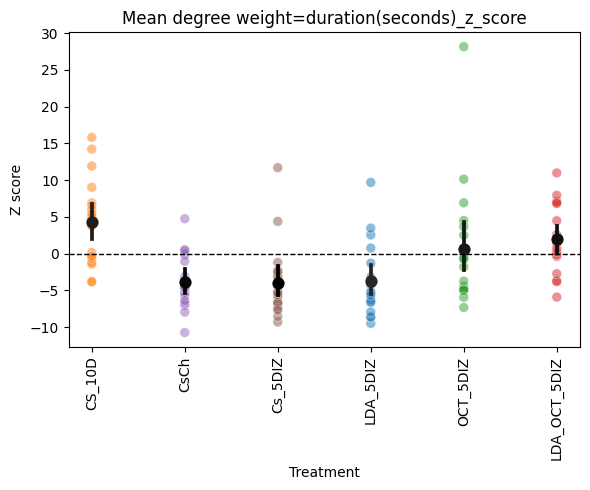

/tmp/ipykernel_1124851/537596387.py:71: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:black'` for the same effect.

  sns.pointplot(data=filtered_dataframes, x='Treatment', y=measure_name, hue='Treatment', order=filtered_treatments, color='black') # errorbar='se',


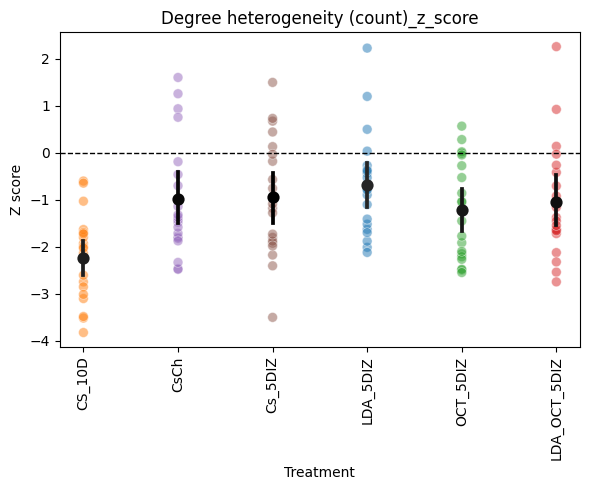

/tmp/ipykernel_1124851/537596387.py:71: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:black'` for the same effect.

  sns.pointplot(data=filtered_dataframes, x='Treatment', y=measure_name, hue='Treatment', order=filtered_treatments, color='black') # errorbar='se',


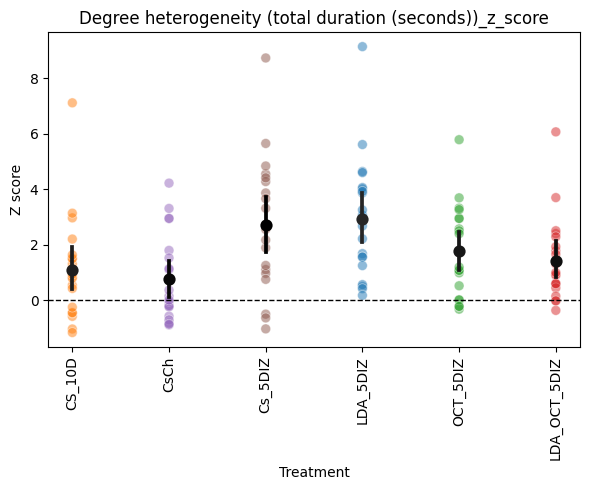

/tmp/ipykernel_1124851/537596387.py:71: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:black'` for the same effect.

  sns.pointplot(data=filtered_dataframes, x='Treatment', y=measure_name, hue='Treatment', order=filtered_treatments, color='black') # errorbar='se',


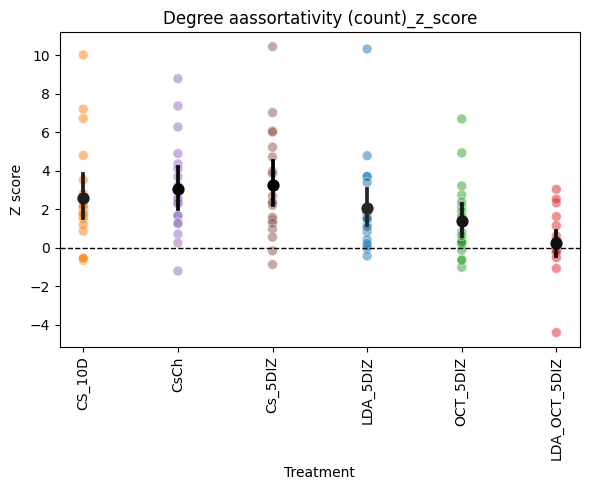

/tmp/ipykernel_1124851/537596387.py:71: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:black'` for the same effect.

  sns.pointplot(data=filtered_dataframes, x='Treatment', y=measure_name, hue='Treatment', order=filtered_treatments, color='black') # errorbar='se',


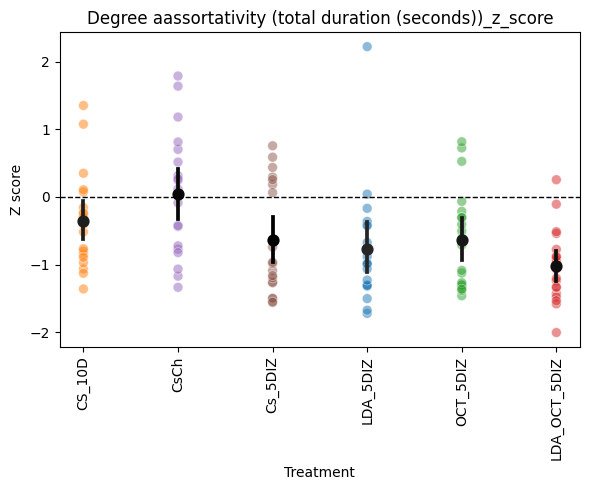

/tmp/ipykernel_1124851/537596387.py:71: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:black'` for the same effect.

  sns.pointplot(data=filtered_dataframes, x='Treatment', y=measure_name, hue='Treatment', order=filtered_treatments, color='black') # errorbar='se',


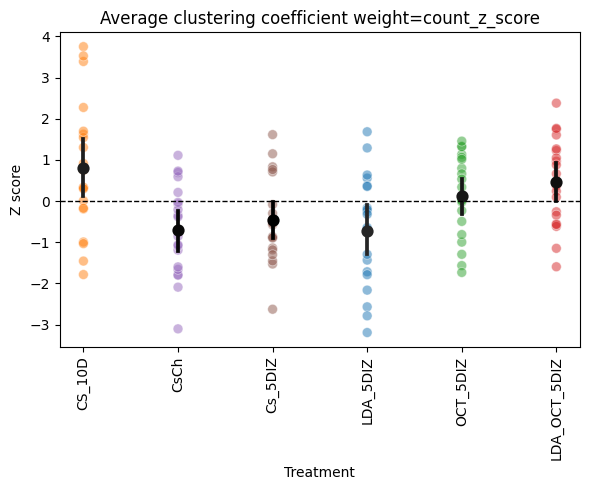

/tmp/ipykernel_1124851/537596387.py:71: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:black'` for the same effect.

  sns.pointplot(data=filtered_dataframes, x='Treatment', y=measure_name, hue='Treatment', order=filtered_treatments, color='black') # errorbar='se',


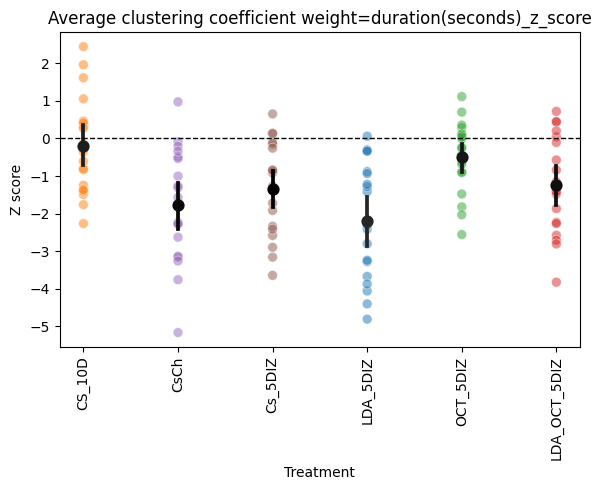

/tmp/ipykernel_1124851/537596387.py:71: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:black'` for the same effect.

  sns.pointplot(data=filtered_dataframes, x='Treatment', y=measure_name, hue='Treatment', order=filtered_treatments, color='black') # errorbar='se',


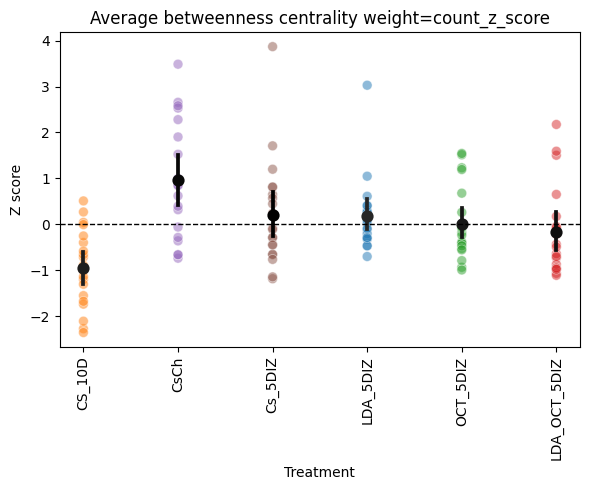

/tmp/ipykernel_1124851/537596387.py:71: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:black'` for the same effect.

  sns.pointplot(data=filtered_dataframes, x='Treatment', y=measure_name, hue='Treatment', order=filtered_treatments, color='black') # errorbar='se',


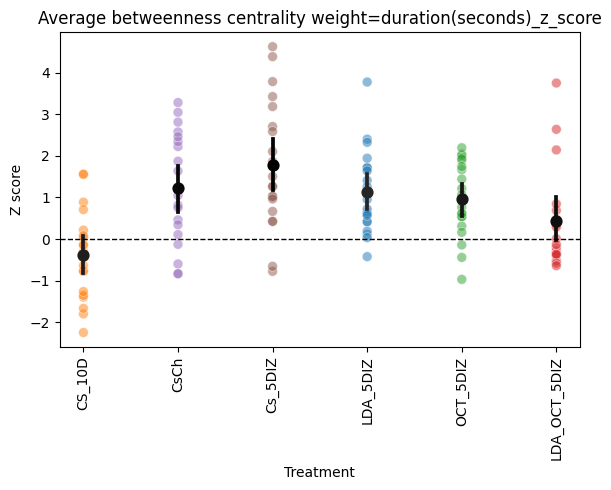

/tmp/ipykernel_1124851/537596387.py:71: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:black'` for the same effect.

  sns.pointplot(data=filtered_dataframes, x='Treatment', y=measure_name, hue='Treatment', order=filtered_treatments, color='black') # errorbar='se',


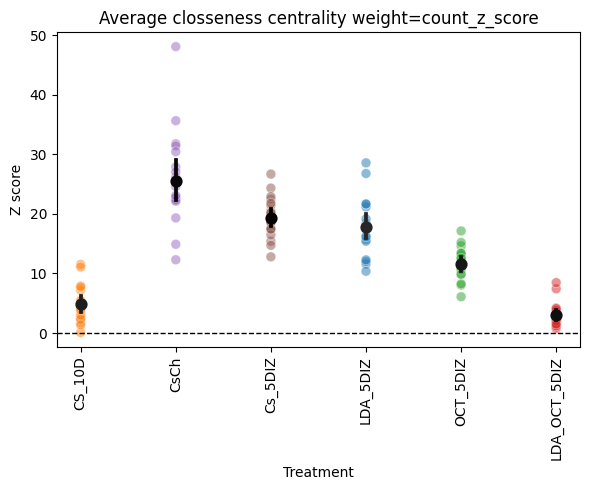

/tmp/ipykernel_1124851/537596387.py:71: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:black'` for the same effect.

  sns.pointplot(data=filtered_dataframes, x='Treatment', y=measure_name, hue='Treatment', order=filtered_treatments, color='black') # errorbar='se',


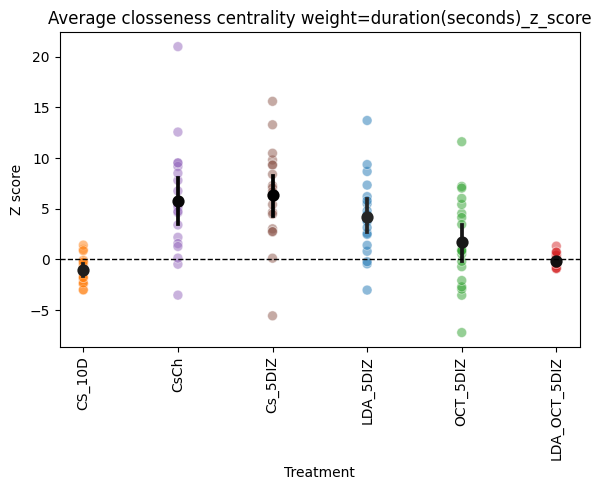

/tmp/ipykernel_1124851/537596387.py:71: FutureWarning: 

Setting a gradient palette using color= is deprecated and will be removed in v0.14.0. Set `palette='dark:black'` for the same effect.

  sns.pointplot(data=filtered_dataframes, x='Treatment', y=measure_name, hue='Treatment', order=filtered_treatments, color='black') # errorbar='se',


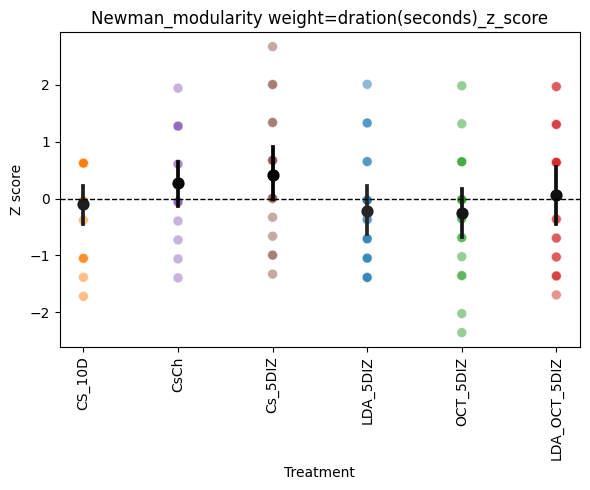

In [13]:
import os
import toml
import scipy
import sys

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

import scipy.stats


from src import settings
from src.utils import fileio

config = fileio.get_config(settings.CONFIG_NAME)
TREATMENTS = config["TREATMENTS"]

INPUT_PATH = os.path.join(settings.RESULTS_DIR, "global_measures")
all_treatments = fileio.load_files_from_folder(INPUT_PATH)

dataframes = []
for treatment_name, treatment_path in all_treatments.items():
    treatment_name = treatment_name.replace(".csv", "")
    if treatment_name in TREATMENTS:
        df = pd.read_csv(treatment_path, index_col=0, on_bad_lines="skip")

        df["Treatment"] = treatment_name
        dataframes.append(df)

combined_data = pd.concat(dataframes)
combined_data_reset = combined_data.reset_index()

for measure_name in combined_data.columns.tolist():
    if measure_name == "Treatment":
        continue

    random_mean_stds = {}
    for treatment in TREATMENTS:
        if treatment.startswith("pseudo_"):
            random_mean_stds[f"mean_{treatment}"] = combined_data_reset[combined_data_reset["Treatment"] == treatment][
                measure_name
            ].mean()
            random_mean_stds[f"std_{treatment}"] = combined_data_reset[combined_data_reset["Treatment"] == treatment][
                measure_name
            ].std()

    for treatment in TREATMENTS:
        if not treatment.startswith("pseudo_"):
            mean_measure_random = random_mean_stds[f"mean_pseudo_{treatment}"]
            std_measure_random = random_mean_stds[f"std_pseudo_{treatment}"]

            observations = combined_data_reset[combined_data_reset["Treatment"] == treatment][measure_name]
            z_scores = (observations - mean_measure_random) / std_measure_random
            combined_data_reset.loc[combined_data_reset["Treatment"] == treatment, f"{measure_name}_z_score"] = z_scores


filtered_treatments = [treatment for treatment in TREATMENTS if not treatment.startswith("pseudo_")]
filtered_dataframes = combined_data_reset[combined_data_reset["Treatment"].isin(filtered_treatments)].copy()
filtered_dataframes = filtered_dataframes.dropna(axis=1, how="any")

# filtered_dataframes = combined_data_reset
filtered_treatments = [treatment for treatment in TREATMENTS if not treatment.startswith("pseudo_")]
z_score_columns = [col for col in filtered_dataframes.columns if "z_score" in col]

for measure_name in z_score_columns:
    plt.figure(figsize=(6, 5))

    sns.pointplot(
        data=filtered_dataframes,
        x="Treatment",
        y=measure_name,
        hue="Treatment",
        order=filtered_treatments,
        color="black",
    )  # errorbar='se',
    sns.scatterplot(
        data=filtered_dataframes,
        x="Treatment",
        y=measure_name,
        hue="Treatment",
        legend=False,
        marker="o",
        s=50,
        facecolor="none",
        alpha=0.5,
    )

    plt.xticks(rotation=90)
    plt.xlabel("Treatment")
    plt.ylabel("Z score")
    plt.title(f"{measure_name}")
    plt.axhline(y=0, color="black", linestyle="--", linewidth=1)
    # plt.legend(title='Treatment', bbox_to_anchor=(1.05, 1), loc='upper left')  # Add legend

    plt.tight_layout()
    # plt.savefig(f"./res/{measure_name}.png")
    plt.show()

    import sys

    sys.exit()

In [10]:
filtered_dataframes.to_excel("global_z_scores_final.xlsx")

In [9]:
!pip install openpyxl

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 250.0/250.0 kB 3.4 MB/s eta 0:00:0000:010:01
